# **Phase 3:**

# Read Dataset:

In [63]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import make_pipeline




df = pd.read_csv("Dataset/Preprocessed_data.csv")
df

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,Older_Adults,0,1,2,1,Obese,1,0.224975,0.244179,0.489903,...,0,1,73.765109,0,0,0,0.445156,0.448528,0.721628,1
1,Older_Adults,1,0,1,2,Obese,0,0.078918,0.830564,0.894218,...,0,0,91.445753,0,0,1,0.845172,0.596122,0.502794,1
2,Seniors,1,0,1,3,Normal,0,0.058832,0.610553,0.772336,...,0,0,54.485744,0,0,0,0.674977,0.895280,0.703974,0
3,Young_Adults,1,1,1,2,Obese,1,0.085705,0.865020,0.480422,...,0,0,77.866758,0,0,1,0.351638,0.312195,0.472087,0
4,Young_Adults,1,0,1,3,Underweight,0,0.773263,0.463001,0.253243,...,0,0,37.731808,0,0,0,0.303936,0.697809,0.789337,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,Older_Adults,0,0,2,2,Normal,0,0.547393,0.321683,0.833915,...,0,1,88.122729,0,0,1,0.788400,0.384736,0.881119,0
1875,Seniors,1,0,2,2,Overweight,0,0.803538,0.711050,0.303456,...,1,0,77.128599,0,0,1,0.105333,0.521637,0.091619,1
1876,Older_Adults,1,0,0,2,Obese,0,0.243267,0.988720,0.265670,...,0,0,13.148221,0,0,0,0.137584,0.337513,0.301933,1
1877,Older_Adults,0,1,2,0,Obese,0,0.318175,0.475083,0.873707,...,0,0,54.370980,0,0,0,0.282418,0.000387,0.491780,1


# Clustering:


In [3]:
# STEP 1: PREPARE DATA FOR K-MEANS (CONVERT CATEGORICAL TO NUMERICAL)

# Create a copy of the dataframe for clustering
df_cluster = df.copy()

# Convert categorical columns to numerical using Label Encoding
categorical_cols = ['Age', 'BMI']  # These were discretized in Phase 2

label_encoders = {}
for col in categorical_cols:
    if col in df_cluster.columns and df_cluster[col].dtype == 'object':
        le = LabelEncoder()
        df_cluster[col] = le.fit_transform(df_cluster[col])
        label_encoders[col] = le
        print(f"Encoded {col}: {dict(enumerate(le.classes_))}")

print(f"\nData types after encoding:")
print(df_cluster.dtypes.value_counts())

Encoded Age: {0: 'Older_Adults', 1: 'Seniors', 2: 'Young_Adults'}
Encoded BMI: {0: 'Normal', 1: 'Obese', 2: 'Overweight', 3: 'Underweight'}

Data types after encoding:
int64      25
float64    19
Name: count, dtype: int64


In [ ]:
# Extract features(X) "excluding the target variable"
X = df.drop('Diagnosis', axis=1)
# Scale the features (X)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist() # encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)
print("\nScaled DataFrame:")
print(scaled_df.head())


Scaled DataFrame:
     Gender  Ethnicity  SocioeconomicStatus  EducationLevel   Smoking  \
0 -0.975292   0.233251             1.318079       -0.789795  1.597493   
1  1.025334  -0.721604             0.010439        0.339600 -0.625981   
2  1.025334  -0.721604             0.010439        1.468995 -0.625981   
3  1.025334   0.233251             0.010439        0.339600  1.597493   
4  1.025334  -0.721604             0.010439        1.468995 -0.625981   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0           -0.946653         -0.965393     0.001057     -1.718582   
1           -1.440586          1.085505     1.411289      0.281561   
2           -1.508511          0.316010     0.986171      0.397372   
3           -1.417635          1.206012    -0.032011     -0.424972   
4            0.907540         -0.200055    -0.824400      1.590389   

   FamilyHistoryDiabetes  ...  WaterQuality  MedicalCheckupsFrequency  \
0               1.787231  ...     -0.500998     

In [47]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(42)

# Perform K-means clustering for K=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(scaled_df)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[ 1.04688259e-02  7.37122521e-03  9.61175386e-03  8.85359142e-03
   6.88665680e-03 -3.64459417e-04  5.06187473e-03  6.07033744e-03
   8.81880527e-03 -5.86234992e-03 -9.17565986e-03  4.04620472e-03
  -1.60705022e-02 -5.69989206e-04 -5.13610181e-03  1.67735045e-02
  -5.94781635e-03 -4.16664509e-04 -9.96357257e-03  1.37974086e-02
  -3.14664168e-03  6.78983225e-03  1.38174749e-02 -1.39368398e-02
  -8.16834634e-03 -4.67455593e-03 -4.31121154e-03 -3.43410440e-03
   7.32161149e-03  5.40651244e-03 -1.99706692e-04 -7.78092106e-03
  -4.98192413e-03 -3.53765036e-01 -2.21449940e-02 -2.34574651e-01
  -1.91918449e-02 -9.80751338e-03 -1.69541211e-02 -1.26229940e-02
   8.97463376e-03  1.25244625e-02  1.25393225e-03  1.81567053e-02
  -6.63513366e-03  5.28069896e-03  3.23774721e-04]
 [-5.55409856e-02 -3.91070707e-02 -5.09939022e-02 -4.69715706e-02
  -3.65362564e-02  1.93359174e-03 -2.68551139e-02 -3.22053808e-02
  -4.67870172e-02  3.11019303e-02  4.86802626e-02 -2.14666096e-02
   8.525

In [77]:
# Convert categorical columns to numbers
df_numeric = df.copy()

# Check which columns are not numeric
print("Columns that need conversion:")
print(df_numeric.select_dtypes(include=['object', 'category']).columns)

# Simple method: convert Age and BMI categories to numbers
if 'Age' in df_numeric.columns:
    df_numeric['Age'] = df_numeric['Age'].map({
        'Children': 0,
        'Young_Adults': 1, 
        'Older_Adults': 2,
        'Seniors': 3
    })

if 'BMI' in df_numeric.columns:
    df_numeric['BMI'] = df_numeric['BMI'].map({
        'Underweight': 0,
        'Normal': 1,
        'Overweight': 2,
        'Obese': 3
    })

# Check if all columns are numeric now
print("\nAfter conversion:")
print(df_numeric.dtypes)
print("\nAll columns are numeric:", all(df_numeric.dtypes != 'object'))

# Show first few rows to verify
print("\nFirst 5 rows:")
print(df_numeric.head())
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

Columns that need conversion:
Index(['Age', 'BMI'], dtype='object')

After conversion:
Age                                int64
Gender                             int64
Ethnicity                          int64
SocioeconomicStatus                int64
EducationLevel                     int64
BMI                                int64
Smoking                            int64
AlcoholConsumption               float64
PhysicalActivity                 float64
DietQuality                      float64
SleepQuality                     float64
FamilyHistoryDiabetes              int64
GestationalDiabetes                int64
PolycysticOvarySyndrome            int64
PreviousPreDiabetes                int64
Hypertension                       int64
SystolicBP                       float64
DiastolicBP                      float64
FastingBloodSugar                float64
HbA1c                            float64
SerumCreatinine                  float64
BUNLevels                        float64
Cholesterol

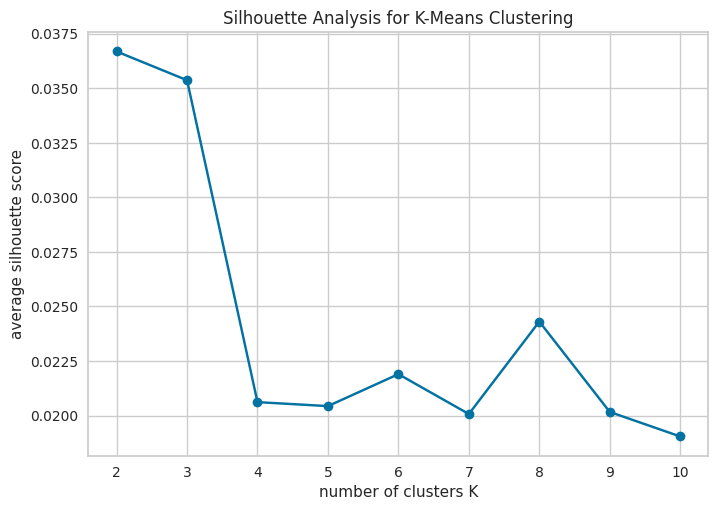

In [78]:
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
# Evaluate K-means with different values of K
wss_values=[]
k_values = range(2, 11)  # Test K from 2 to 10 that’s mean more than 3 times
silhouette_scores = []
# Calculate silhouette score 
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.result = kmeans.fit(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values , silhouette_scores , marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('number of clusters K')
plt.ylabel('average silhouette score')
plt.show()

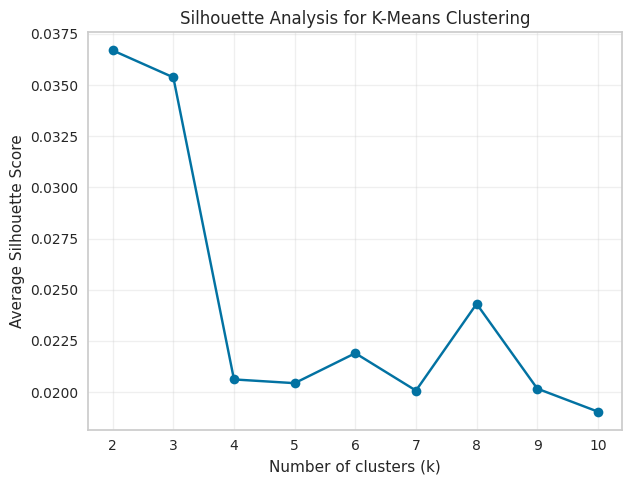

In [79]:
# Plot the results
plt.figure(figsize=(12, 5))

# Silhouette Score Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True, alpha=0.3)  

plt.tight_layout()
plt.show()

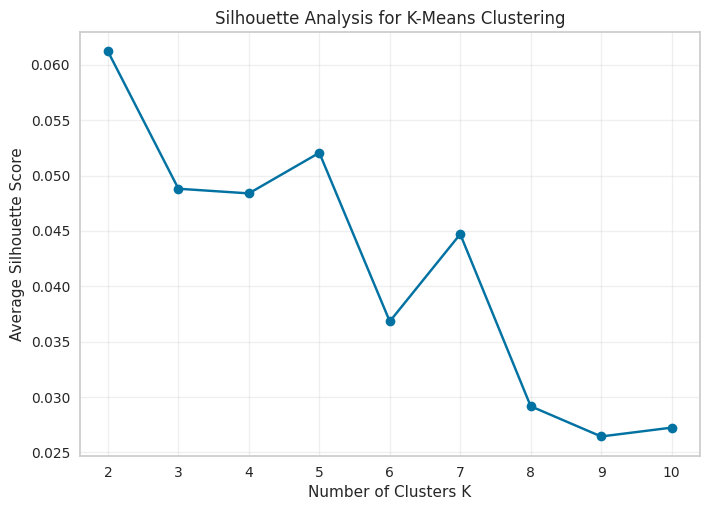

In [ ]:
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Evaluate K-means with different values of K
wss_values = []
k_values = range(2, 11)
silhouette_scores = []

# Calculate silhouette score 
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)  # Just fit it normally
    silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)  # Now labels_ exists!
    silhouette_scores.append(silhouette_avg)
    wss_values.append(kmeans.inertia_)

plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters K')
plt.ylabel('Average Silhouette Score')
plt.grid(True, alpha=0.3)
plt.show()

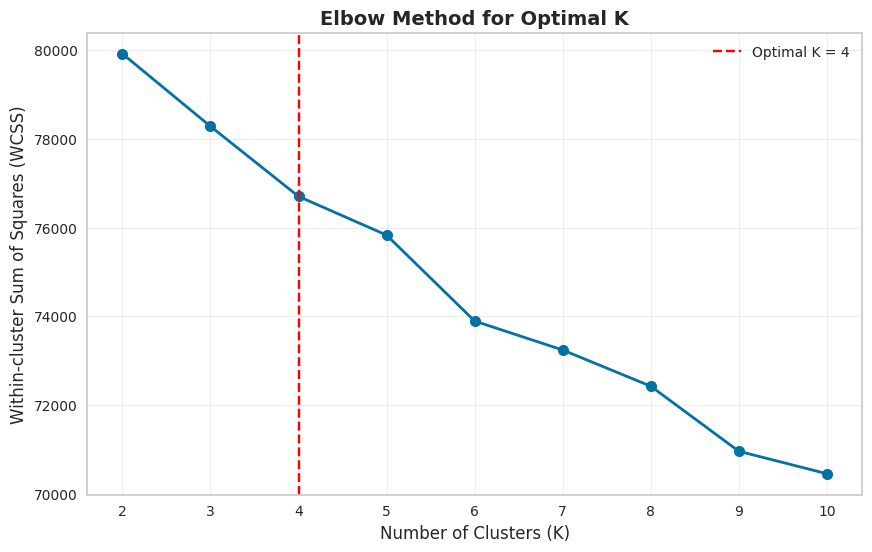

Optimal K based on Elbow Method: 4


In [82]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have your scaled data ready
# scaled_data = ...

k_values = range(2, 11)
wss_values = []  # Within-cluster sum of squares (inertia)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wss_values.append(kmeans.inertia_)  # store the WCSS

# Now plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, wss_values, marker='o', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-cluster Sum of Squares (WCSS)', fontsize=12)
plt.grid(True, alpha=0.3)

# Optional: mark your chosen K visually
optimal_k = 4
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f'Optimal K = {optimal_k}')
plt.legend()
plt.show()

print(f"Optimal K based on Elbow Method: {optimal_k}")


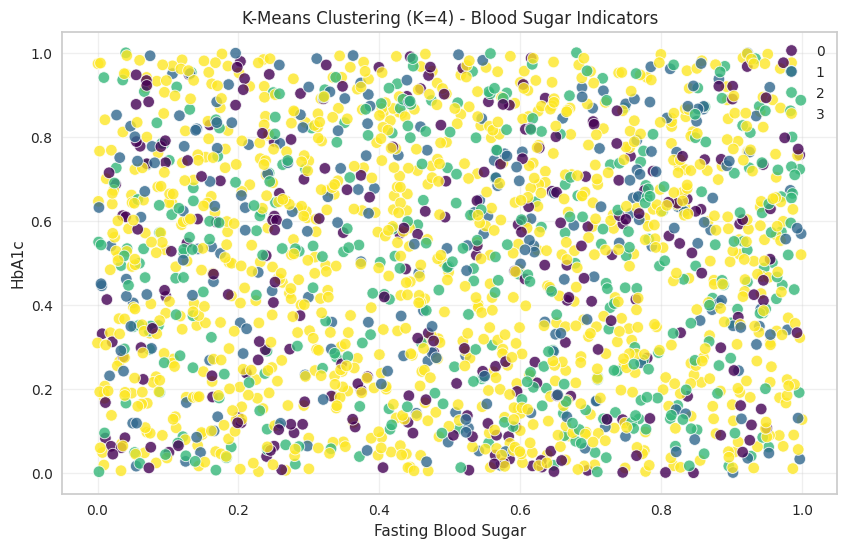

In [83]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_df)
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='FastingBloodSugar', y='HbA1c', hue='Cluster', data=df, 
               palette='viridis', alpha=0.8, s=70)
plt.title(f'K-Means Clustering (K={optimal_k}) - Blood Sugar Indicators')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('HbA1c')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

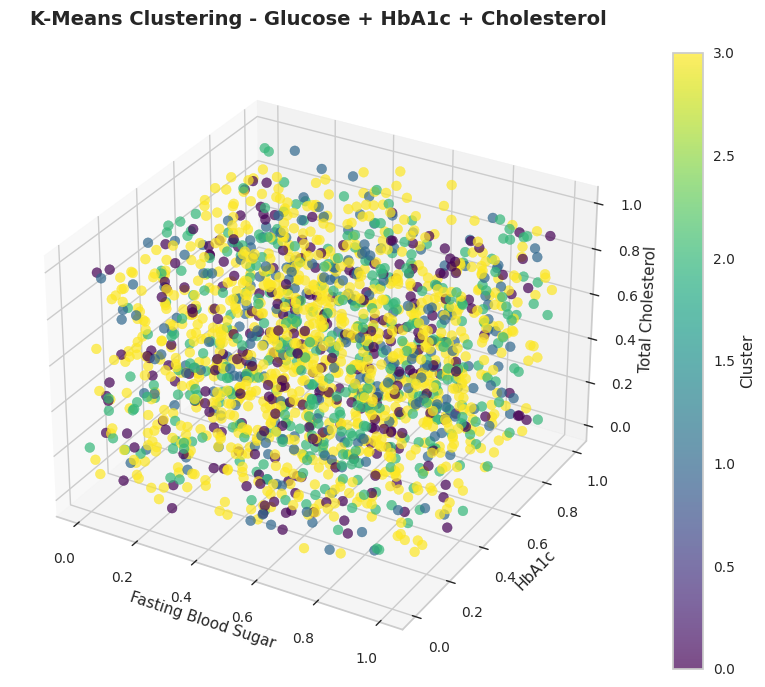

In [84]:
plt.rcParams['font.family'] = 'DejaVu Sans'
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Use features that are definitely numerical , and the ones earlier analysis showed these were most correlated with diabetes
scatter = ax.scatter(df['FastingBloodSugar'],  
                     df['HbA1c'],              
                     df['CholesterolTotal'],  
                     c=df['Cluster'], 
                     cmap='viridis', 
                     alpha=0.7,
                     s=50)

ax.set_title("K-Means Clustering - Glucose + HbA1c + Cholesterol", 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Fasting Blood Sugar')
ax.set_ylabel('HbA1c')
ax.set_zlabel('Total Cholesterol')

plt.colorbar(scatter, label='Cluster')
plt.show()

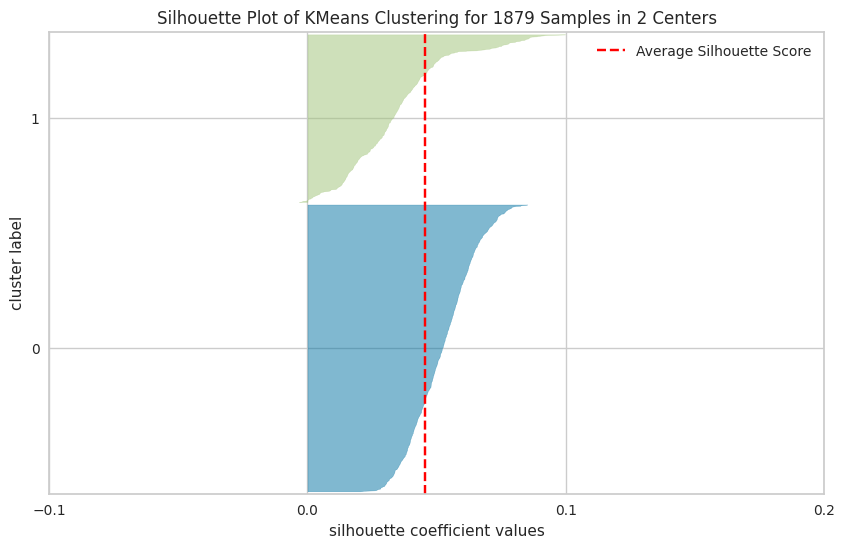

Average Silhouette Score for K=2: 0.0457


In [89]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# Example: K=2
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Create the silhouette plot for K=2
fig, ax = plt.subplots(figsize=(10, 6))

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)
visualizer.fit(scaled_df)  # scaled_df should be your preprocessed numeric data
visualizer.show()

# Show the actual average silhouette score
print(f"Average Silhouette Score for K={k}: {visualizer.silhouette_score_:.4f}")
